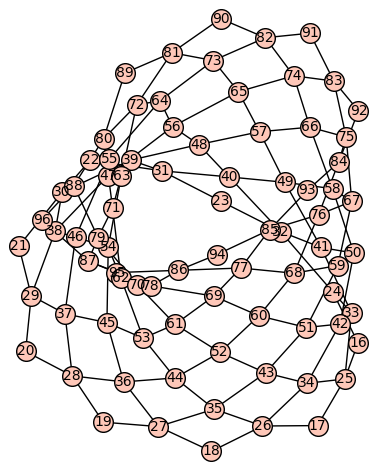

[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,

written


In [21]:
import numpy as np

def writePitches(fn,inds,tempo=82,instrument=[0,0],add21=True,start_at= [0,0],durationsInQuarterNotes=False):
    from MidiFile import MIDIFile

    track    = 0
    channel  = 0
    time     = 0   # In beats
    duration = 1   # In beats # In BPM
    volume   = 116 # 0-127, as per the MIDI standard

    ni = len(inds)
    MyMIDI = MIDIFile(ni,adjust_origin=False) # One track, defaults to format 1 (tempo track
                     # automatically created)
    MyMIDI.addTempo(track,time, tempo)


    for k in range(ni):
        MyMIDI.addProgramChange(k,k,0,instrument[k])


    times = start_at
    for k in range(len(inds)):
        channel = k
        track = k
        for i in range(len(inds[k])):
            pitch,duration,volume,isPause,tempo = inds[k][i]
            #print(pitch,duration,volume,isPause)
            track = k
            channel = k
            if not durationsInQuarterNotes:
                duration = 4*duration#*maxDurations[k] #findNearestDuration(duration*12*4)            
            #print(k,pitch,times[k],duration,100)
            if not isPause: #rest
                #print(volumes[i])
                # because of median:
                pitch = int(np.floor(pitch))
                if add21:
                    pitch += 21
                #print(pitch,times[k],duration,volume,isPause)    
                MyMIDI.addTempo(track,times[k], tempo)
                MyMIDI.addNote(track, channel, int(pitch), float(times[k]) , float(duration), int(volume))
                times[k] += duration*1.0  
            else:
                times[k] += duration*1.0
       
    with open(fn, "wb") as output_file:
        MyMIDI.writeFile(output_file)
    print("written")  

    
def numberToBase(x, b,numDigits=100):
    if RR(x) == 0:
        return [0]
    digits = Integer(int(floor(x))).digits(base=b)
    #digits.reverse()
    x = x-int(floor(x))
    for n in range(numDigits):
        d = int(floor(x))%b
        if n>=len(digits):
            digits.insert(0,d)
        x = b*(x-d)
    return digits[::-1]

def bb(n):
    if n==0:
        return 32
    else:
        if n%2==0:
            return bb(n-1)+3
        if n%2==1:
            return bb(n-1)+4
        
bbs = [bb(n) for n in range(20)]        

def pitchBitSign(pitch,bit, bbs=bbs):
    if pitch in bbs:
        index = bbs.index(pitch)
        if 0<=index+(-1)**bit<=len(bbs)-1:
            return bbs[index+(-1)**bit]
        else:
            return bbs[index+(-1)**(bit+1)]
        

def HH(start,end):
    H = Graph(loops=False)
    for a in range(start,end+1):
        H.add_vertex(a)
        for b in range(start,end+1):
            if abs(a-b) in [8,9]:
                H.add_edge(a,b)
    return H 

H = HH(16,96)
H.plot().show()
        
        

iinds = []        
bits = numberToBase(x= pi,b=2,numDigits=100)
print(bits)

numberOfBars = 80

durs = [18,12,4,18,12,6]

vols = []
for inst in range(len(durs)):
    noten = []    
    startpitch = 60
    sv = 32
    sign = (-1)**inst    
    bits = numberToBase(x= 1/nth_prime(inst+2),b=2,numDigits=numberOfBars*durs[inst])
    print(bits)
    barcounter = 1
    for b in bits:
        #print(startpitch)
        startpitch = pitchBitSign(startpitch,b,bbs)
        vols.extend(H.shortest_path(sv,(sv+5)%(96-16)+16))
        sv = vols[-1]
        vol = vols.pop(0)      
        dd = Integer(floor(barcounter)).digits(2,padto=6)
        duration = 1/durs[inst]
        noten.append((startpitch,duration,vol*sum(dd)/3,dd[inst]==0,80))
        barcounter += duration
    iinds.append(noten) 
    #if r==1:
    #iinds.append(lh)                         
    #if r==2:
    #iinds.append(rh)                         
fn = "./midi/bits_of_quotients_of_primes.mid"    
writePitches(fn,iinds,tempo=80,instrument=(len(iinds))*[0],add21=False,start_at= len(iinds)*[0],durationsInQuarterNotes=False)        
        
    